# 실습 및 과제 1

## 1.1 문장 벡터로 표현하기 & 코사인 유사도 적용하기

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
import pandas as pd

# Cosine Simiarity
def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])
# doc2 vecter & doc3 vector는 linear combination.-> cosine similarity is 1
print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

## 1.2 실제 텍스트 문장 벡터로 표현하기 - 단순 TF 이용

In [ ]:
# 텍스트 데이터 (말뭉치)
# 아래 TEXT 변수의 각 원소가 하나의 문서를 의미합니다.
# CountVectorizer나 TfidfVectorizer 클래스를 이용하기 위해서는 
# 각 문서는 단어들로 구성된 하나의 문자열값으로 저장되어야 합니다.

TEXT = ['banana apple apple eggplant', 
        'orange carrot banana eggplant', 
        'apple carrot banana banana', 
        'orange banana grape'
]

In [ ]:
# CountVectorizer 이용하기
from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM
# Convert a collection of text documents to a matrix of token counts.
# This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.
'''
DTM: [d1:[t1,t2,…],
    d2:[t3,t2,…]],...
'''
# max_df : When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
# min_df : When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature.
# 실수: 비율(a proportion of documents), 정수: 횟수(absolute counts) 
tf_vectorizer = CountVectorizer(min_df=2, max_df=0.8, ngram_range=(1,1))
tf_features = tf_vectorizer.fit_transform(TEXT)

In [ ]:
'''(문서전체에서 총 등장 횟수, 해당단어가 나오는 document 수)
banana    (5,4)
apple     (3,2)
eggplant  (2,2)
orange    (2,2)
carrot    (2,2)
grape     (1,1)
'''
# 'grape'는 min_df=2때문에(총 등장횟수가 1<2) 워드 목록에서 제외--너무 적게 나오는 단어
# 'banana'는 max_df=0.8때문에(등장문서수4/전체문서수4>0.8) 워드 목록에서 제외--너무 자주 나오는 단어는 유의미하지 않다

In [ ]:
# 단어들의 이름 확인하기
feature_names = tf_vectorizer.get_feature_names_out()
print(feature_names)

In [ ]:
# 벡터화 된 문서 확인
''' w1 w2 w3 w4 
d1
d2
d3
d4
'''
features = np.array(tf_features.todense())
features

In [ ]:
# 문서 벡터 집합 데이터프레임으로 표현하기
import pandas as pd
df = pd.DataFrame(data=features, columns=feature_names)
df

In [ ]:
# Cosine 유사도 계산
print('문서 0과 문서1의 유사도 :',cos_sim(features[0], features[1]))
print('문서 1과 문서2의 유사도 :',cos_sim(features[1], features[2]))
print('문서 2와 문서3의 유사도 :',cos_sim(features[2], features[3]))

## 1.3 실제 텍스트 문장 벡터로 표현하기 - TF-IDF 이용

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM
tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.8, ngram_range=(1,1))
tfidf_features = tfidf_vectorizer.fit_transform(TEXT)

In [ ]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(tfidf_feature_names)

In [ ]:
#features와 다른 점 확인하기(0은 그대로, 정수->실수로 dense vector화, 전체 문서에대한 정보 반영)
tfidf_features = np.array(tfidf_features.todense())
tfidf_features

In [ ]:
df = pd.DataFrame(data=tfidf_features, columns=tfidf_feature_names)
df

In [ ]:
# Cosine 유사도 계산
print('문서 0과 문서1의 유사도 :',cos_sim(tfidf_features[0], tfidf_features[1]))
print('문서 1과 문서2의 유사도 :',cos_sim(tfidf_features[1], tfidf_features[2]))
print('문서 2와 문서3의 유사도 :',cos_sim(tfidf_features[2], tfidf_features[3]))

## [1.4 실습 및 과제]

#### 해당 TEXT 파일을 다른 실제 예제 문장 10개를 가져와서 tf 벡터와 tfidf 벡터로 바꾼 후 코사인 유사도를 비교하여라

In [ ]:
TEXT = ['I don’t know how william is gonna feel about this guy being in her apartment',
        'She has such an awesome sense of humor and personality!! Love her and Caleb together!! I’m not sure William would be happy about this tho…',
        'Is it me or was the energy/chemistry between these two insanely good!?, made the interview even more interesting to watch, love it!!! Awesome apartment',
        'The fact that she looked like that in middle school is probably why she has a great personality',
        'I love her personality she is so witty and genuine. So glad you did a longer video with her',
        'She’s so well spoken, no doubt she makes millions',
        'This is one of the coolest girl you’ve ever featured. Her home is dope. She’s got class and great taste. Best part of all relatable and unpretentious!',
        'scientist, model, entrepreneur with a dr strange window and 3 aussies. she''s living my dream life',
        'After a terrible 2022, shell-dazed monetary supporters have incidents to recuperate and a ton to consider, as an extension report and a heap of various data did not near anything to change suppositions that the National bank would likely continue to climb intrest rates whether or not the economy tones down, And that suggests more red ink for portfolios for the chief quarter of year 2023. How should I benefit from the continuous temperamental market, I''m as of now at an intersection picking if to trade my $250k security/stock portfolio.',
        'Her energy is great! Depending on what her subjects are, I would totally listen to a podcast with her! She''s just a boss! The guests usually annoy me because I''d rather Caleb talk, but she stole the show!',
]

In [ ]:
#1 tf벡터 변환 후 코사인 유사도 계산
tf_vectorizer = CountVectorizer(min_df=0.2,max_df=0.9,ngram_range=(1,1))
tf_features = tf_vectorizer.fit_transform(TEXT)

feature_names = tf_vectorizer.get_feature_names_out()
#print(len(feature_names))

features = np.array(tf_features.todense())
#print(features.shape)

tf_cos_sims = []
for i in range(10):
    for j in range(i):
        sim = cos_sim(features[i],features[j])
        tf_cos_sims.append((f'문서{i}와 문서{j}',sim))

tf_cos_sims.sort(key=lambda x:x[1], reverse=True)

for comp in tf_cos_sims:
    print(comp)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(min_df=0.2,max_df=0.9,ngram_range=(1,1))
tfidf_features = tfidf_vectorizer.fit_transform(TEXT)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
#print(len(tfidf_feature_names))

tfidf_features = np.array(tfidf_features.todense())
#print(tfidf_features.shape)

tfidf_cos_sims = []
for i in range(10):
    for j in range(i):
        sim = cos_sim(tfidf_features[i],tfidf_features[j])
        tfidf_cos_sims.append((f'문서{i}와 문서{j}',sim))

tfidf_cos_sims.sort(key=lambda x:x[1], reverse=True)

for comp in tfidf_cos_sims:
    print(comp)

## 2. 긴 문서 표현

In [ ]:
from os import listdir
from os.path import isfile, join

# 아래 코드를 사용하여 폴더에 존재하는 파일의 이름만을 저장합니다.
mypath = '/kaggle/input/2024-1-nlp-1/docs/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

total_docs = []
for file in onlyfiles:
    file_path = mypath+file
    with open(file_path, 'r', encoding='utf8') as f:
        content = f.read()
    total_docs.append(content)

In [ ]:
len(total_docs)

In [ ]:
# 첫번째 문서
total_docs[0]

## 2.1 문서 전처리

In [ ]:
# import a python file for English text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #원형화
import re

def my_preprocessing(text, customized_stopwords=None):
# 1. 불필요한 symbols과 marks 제거하기
	filtered_content = re.sub(r'[^\s\d\w]','',text)

# 2. Case conversion; 대문자를 소문자로 바꾸기
	filtered_content = filtered_content.lower()

# 3. Word tokenization
	word_tokens = nltk.word_tokenize(filtered_content)

# 4. POS tagging
	tokens_pos = nltk.pos_tag(word_tokens)

# 5. Select Noun words
	NN_words = []
	for word, pos in tokens_pos:
		if 'NN' in pos:
			NN_words.append(word)

# 6. Lemmatization
# nltk에서 제공되는 WordNetLemmatizer을 이용하는 경우 
	wlem = WordNetLemmatizer()
	lemmatized_words = []
	for word in NN_words:
		#print(word, pos)
		#new_word = wlem.lemmatize(word)
		#print('lemma: ', new_word)
		lemmatized_words.append(word)

# 7. Stopwords removal
# 1차적으로 nltk에서 제공하는 불용어사전을 이용해서 불용어를 제거할 수 있습니다.

	stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
	#print('stopwords: ', stopwords_list)
	unique_NN_words = set(lemmatized_words)
	final_NN_words = lemmatized_words

	for word in unique_NN_words:
		if word in stopwords_list:
			while word in final_NN_words: final_NN_words.remove(word)
				

	return final_NN_words

In [ ]:
# 각 문서의 전처리
# 전처리의 결과물은 불용어가 제거된 명사 단어들
docs_nouns = [my_preprocessing(doc, stopwords) for doc in total_docs]
docs_nouns[0]

In [ ]:
documents_filtered = [' '.join(doc) for doc in docs_nouns]
print(len(documents_filtered))
documents_filtered[0]

## [실습 및 과제 2]

#### 위 documents_filtered에 들어 있는 문서 4개를 1.3과 같이 tf-idf vectorizer를 통해서 벡터화하고 해당 결과를 1.3의 데이터프레임처럼 만들어라.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.75, ngram_range=(1,1))
tfidf_features = tfidf_vectorizer.fit_transform(documents_filtered)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
#print(len(tfidf_feature_names))

tfidf_features = np.array(tfidf_features.todense())
print(tfidf_features.shape)

df = pd.DataFrame(data=tfidf_features, columns=tfidf_feature_names)
df

## 3. Word2Vec을 이용한 문장 학습 및 단어 임베딩

In [ ]:
with open('/kaggle/input/2024-1-nlp-1/2016_filtered_review.txt', encoding='utf-8') as f:
    docs = [line.strip().split('\t\t') for line in f]
print(len(docs))

for doc in docs[:10]:
    print("\nreview_id:", doc[0])
    print("review:", doc[1])
    print("rating:", doc[2])

In [ ]:
# 문서의 리뷰 부분만 뽑아서 전처리
reviews = [doc[1].strip().split() for doc in docs]

In [ ]:
print(reviews[:3])

### gensim 모듈을 이용한 Word2Vec 학습

In [ ]:
from gensim.models import Word2Vec

#gensim.models.Word2Vec 파라미터
#window : Maximum distance between the current and predicted word within a sentence.
#min_count : Ignores all words with total frequency lower than this.
#vector_size : Dimensionality of the word vectors.
#sg : Training algorithm: 1 for skip-gram; otherwise CBOW(Continuous Bag of Words)
#-- In the skip-gram model, the goal is to predict the context words (words surrounding a target word) given the target word. It takes a target word as input and predicts the context words.
#----For each target word in the training data, the skip-gram model generates multiple training samples, each consisting of a target word-context word pair.
#-- In the CBOW model, the goal is to predict the target word based on its context words. It takes the context words as input and predicts the target word.
#----CBOW takes a fixed-size window of context words surrounding a target word and treats this window as a single training sample.
#negative : If > 0, negative sampling will be used, the int for negative specifies how many “noise words” should be drawn (usually between 5-20). If set to 0, no negative sampling is used.

model_sg_n10 = Word2Vec(reviews, window=3, min_count=3, vector_size=100, sg=1, negative=10)

In [ ]:
#The trained word vectors are stored in a KeyedVectors instance, as model.wv:
model_sg_n10.wv['이정재']

In [ ]:
model_sg_n10.wv.similarity('이정재', '이범수')

In [ ]:
model_sg_n10.wv.most_similar('이정재',topn=10)

In [ ]:
model_sg_n10.wv.most_similar('재밌',topn=10)

In [ ]:
model_sg_n10.wv['우주평화']

## [실습 및 과제 3]

#### 실습에서 학습한 word2vec을 모델을 기반으로 본인이 원하는 단어 5개를 선정하고, 이에 대해 most_similar를 통해 가장 가까운 단어 10개를 포함하여 시각화한 결과물을 보여라.
#### 총 50개의 단어에 대한 벡터를 시각화하면 된다.
#### Hint1: t-nse를 이용한 시각화
#### Hint2: [예시]
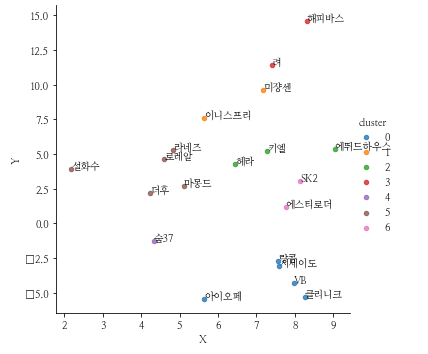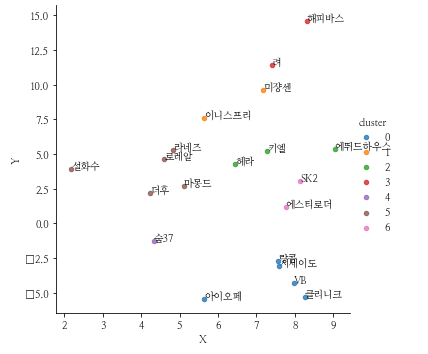

In [ ]:
%matplotlib inline

In [ ]:
plt.rcParams['font.family'] = 'Arial Unicode MS'

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

def change_matplotlib_font(font_download_url):
    FONT_PATH = 'MY_FONT'
    
    font_download_cmd = f"wget {font_download_url} -O {FONT_PATH}.zip"
    unzip_cmd = f"unzip -o {FONT_PATH}.zip -d {FONT_PATH}"
    os.system(font_download_cmd)
    os.system(unzip_cmd)
    
    font_files = fm.findSystemFonts(fontpaths=FONT_PATH)
    for font_file in font_files:
        fm.fontManager.addfont(font_file)

    font_name = fm.FontProperties(fname=font_files[0]).get_name()
    matplotlib.rc('font', family=font_name)
    print("font family: ", plt.rcParams['font.family'])

In [ ]:
font_download_url = "https://fonts.google.com/download?family=Noto%20Sans%20KR"
change_matplotlib_font(font_download_url)

In [ ]:
## your code here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE

selected_words = ['좀비', '로맨스', '연출', '지루', '공포']

allwords_50 = []
word_vectors_list = []
associated_words = []

for word in selected_words:
    similar_words = model_sg_n10.wv.most_similar(word, topn=10)
    for sw, _ in similar_words:
        allwords_50.append(sw)
    similar_word_vectors = np.array([model_sg_n10.wv[word] for word, _ in similar_words])
    word_vectors_list.extend(similar_word_vectors)
    associated_words.extend([word]*10)

word_vectors_list = np.array(word_vectors_list)
print(word_vectors_list.shape)
#word_vectors_list = word_vectors_list.reshape(50,100)
#print(word_vectors_list.shape)
#지금 sim_words_list는 3차원 array(5,10,100) -> 50 x 100으로 flatten?

#에러 문제--'perplexity must be less than n_samples'
#TSNE의 파라미터 perplexity 조절 default=30.0인데

tsne = TSNE(n_components=2, random_state=42, perplexity = len(word_vectors_list)-1)
embeddings_2d = tsne.fit_transform(word_vectors_list)

    
plt.figure(figsize=(12,9))
sns.scatterplot(x=embeddings_2d[:,0], y=embeddings_2d[:,1], hue=associated_words, palette=sns.color_palette('bright'))
plt.title('t-SNE Visualization of Most Similar Words to "좀비"/"로맨스"/"연출"/"지루"/"공포"')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='lower right')

for i, (x,y) in enumerate(embeddings_2d):
    plt.text(x, y, allwords_50[i], fontsize=9, ha='left',va='bottom')

plt.show()

## 4. Word2Vec을 이용한 문장 학습 및 문장/문서 임베딩

In [ ]:
pip install kiwipiepy

In [ ]:
## 텍스트 전처리 다른 방법
from kiwipiepy import Kiwi
import re

kiwi = Kiwi()
def preprocess(content):
    if len(content.strip()) > 3:
        filtered_content = re.sub(r'[^\s\w\d]',' ', content)
        kiwi_tokens = kiwi.tokenize(filtered_content)
        results = [token.form for token in kiwi_tokens] #form/tag/start/len
        return results

In [ ]:
## 실습 3에서 이용한 리뷰들 중 10,000개만 추리기 (총 788,189개 리뷰)

reviews = [doc[1].strip() for doc in docs][:10000]
reviews[100]

In [ ]:
preprocessed_reviews = [preprocess(review) for review in reviews]

In [ ]:
preprocessed_reviews[100]

### gensim 모듈을 이용한 doc2vec 학습

In [ ]:
# doc2vec 학습이 가능한 형태로 변형
from gensim.models.doc2vec import TaggedDocument
tagged_docs = [TaggedDocument(doc, tags=[i]) for i, doc in enumerate(preprocessed_reviews) if doc != None]

In [ ]:
# words: document / tags: id
tagged_docs[100]

In [ ]:
from gensim.models.doc2vec import Doc2Vec
#vector_size = Dimensionality of the feature vectors.
#min_count = Ignores all words with total frequency lower than this.
#dm = Defines the training algorithm. If dm=1, ‘distributed memory’ (PV-DM) is used. Otherwise, distributed bag of words (PV-DBOW) is employed.
#negative = If > 0, negative sampling will be used, the int for negative specifies how many “noise words” should be drawn (usually between 5-20). If set to 0, no negative sampling is used.
model = Doc2Vec(tagged_docs, vector_size=100, min_count=3, epochs=100, dm=1, negative=5, 
               alpha=0.001)

In [ ]:
print(model.dv[100]) #100번문서에 대한 doc vector.

In [ ]:
print(model.dv.most_similar(100, topn=10)) #100번 리뷰와 가장 비슷한 리뷰 10개들의 id , 유사도점수

In [ ]:
results = model.dv.most_similar(100, topn=10) #문장인덱스 번호를 파라미터로

print("\nOriginal Review:")
print(reviews[100])
for i, result in enumerate(results):
    print("\nSimilar Reviews", i+1)
    print(result)
    review_id = result[0]
    print(reviews[review_id])

# 안 비슷한 문장들이 나옴


## [실습 및 과제 4]

#### 실습 4의 코드를 수정하여 조금 더 많은 양의 문서를 학습하여 더 정확한 비슷한 리뷰 랭킹 결과가 나오게 한다.
#### Hint1: 학습하는 리뷰의 수를 늘리기 (현재는 10,000개의 리뷰만 학습된 상태이고, 총 788,189개 리뷰가 존재한다.)
#### Hint2: doc2vec의 파라미터 변경
#### 1. 개선된 모델에 대한 분석하는 리포트를 작성하라. (어떤 부분을 개선 했는지)
#### 2. 개선의 결과 중 어떤 부분이 비슷한지 자연어처리 관점에서 설명하라.

In [ ]:
reviews = [doc[1].strip() for doc in docs][:20000]


preprocessed_reviews = [preprocess(review) for review in reviews]

from gensim.models.doc2vec import TaggedDocument
tagged_docs = [TaggedDocument(doc, tags=[i]) for i, doc in enumerate(preprocessed_reviews) if doc != None]

from gensim.models.doc2vec import Doc2Vec
model_2 = Doc2Vec(tagged_docs, vector_size=160, min_count=3, epochs=150, dm=1, negative=5, 
               alpha=0.001, )

In [ ]:
results = model_2.dv.most_similar(100, topn=10) 

print("\nOriginal Review:")
print(reviews[100])
for i, result in enumerate(results):
    print("\nSimilar Reviews", i+1)
    print(result)
    review_id = result[0]
    print(reviews[review_id])


In [ ]:
#0.6 이상 정도 나오게 에폭 수 늘리기..gensim 공식 문서 하이퍼파라미터 검색